# Confusion Matrix, Precision, Recall & F1 Score


When we build a **classification model** (e.g., spam detector, disease predictor), we need to measure how good it is.

Simple **accuracy** is not always enough! We need deeper metrics:

| Metric | Question it answers |
|--------|---------------------|
| **Confusion Matrix** | What kinds of errors is my model making? |
| **Precision** | When my model says YES, how often is it right? |
| **Recall** | Out of all actual YES cases, how many did my model catch? |
| **F1 Score** | Balance between Precision and Recall |

---

# import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, accuracy_score
)

# Make plots look nice
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_theme(style='whitegrid')

print('All libraries loaded!')

All libraries loaded!


---
## Step 1: Create Synthetic Data

We'll simulate a **disease prediction** scenario:
- `0` = Healthy (Negative)
- `1` = Has Disease (Positive)

We use `make_classification` from sklearn to generate fake but realistic data.

In [2]:
# Generate synthetic binary classification data
np.random.seed(42)

X, y = make_classification(
    n_samples=500,        # 500 patients
    n_features=5,         # 5 medical features (e.g. age, BP, glucose...)
    n_informative=3,      # 3 features actually matter
    n_redundant=1,
    n_classes=2,          # Binary: Healthy vs Disease
    weights=[0.6, 0.4],   # 60% Healthy, 40% Disease (slight imbalance)
    random_state=42
)

# Add feature names for clarity
feature_names = ['Age', 'Blood_Pressure', 'Glucose', 'BMI', 'Cholesterol']
df = pd.DataFrame(X, columns=feature_names)
df['Disease'] = y

print(f'Dataset shape: {df.shape}')
print(f'\nClass distribution:')
print(df['Disease'].value_counts().rename({0: 'Healthy (0)', 1: 'Disease (1)'}))
print(f'\nFirst 5 rows:')
df.head()

Dataset shape: (500, 6)

Class distribution:
Disease
Healthy (0)    301
Disease (1)    199
Name: count, dtype: int64

First 5 rows:


,Age,Blood_Pressure,Glucose,BMI,Cholesterol,Disease
0,-1.299565,0.608232,-1.518449,1.004770,1.495378,1
1,-0.273844,1.358806,1.194674,1.223679,2.467322,1
2,-2.510600,-2.423153,-0.768365,2.434551,1.227190,0
3,0.374002,-0.794579,-0.093434,-1.252782,-2.123091,0
4,0.378860,1.193772,-0.187534,0.633405,1.692101,1


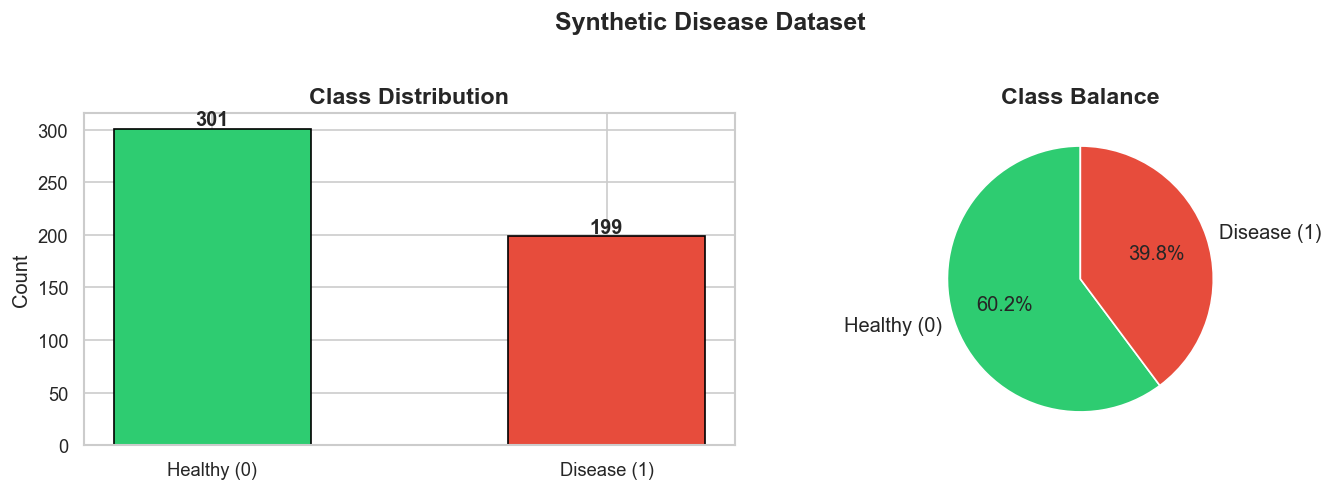

In [4]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart
counts = df['Disease'].value_counts()
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(['Healthy (0)', 'Disease (1)'], counts.values, color=colors, edgecolor='black', width=0.5)
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(counts.values):
    axes[0].text(i, v + 3, str(v), ha='center', fontsize=12, fontweight='bold')

# Pie chart
axes[1].pie(counts.values, labels=['Healthy (0)', 'Disease (1)'],
            colors=colors, autopct='%1.1f%%', startangle=90,
            textprops={'fontsize': 12})
axes[1].set_title('Class Balance', fontsize=14, fontweight='bold')

plt.suptitle('Synthetic Disease Dataset', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## Step 2: Train a Simple Model

We split data into **train** and **test** sets, then train a Logistic Regression model.

In [5]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Training samples : {len(X_train)}')
print(f'Testing  samples : {len(X_test)}')

# Train Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

print(f'\n Model trained! Predictions made on {len(y_test)} test samples.')

Training samples : 400
Testing  samples : 100

 Model trained! Predictions made on 100 test samples.


---
## Step 3: The Confusion Matrix

### What is it?

A **confusion matrix** is a table that shows:
- How many predictions were **correct**
- How many predictions were **wrong** (and what type of wrong)

```
                  PREDICTED
                Negative  Positive
ACTUAL Negative |  TN   |   FP  |
       Positive |  FN   |   TP  |
```

### The 4 Outcomes:

| Term | Full Name | Meaning | Medical Example |
|------|-----------|---------|----------------|
| **TP** | True Positive | Predicted YES, Actually YES ✅ | Patient HAS disease, model says HAS |
| **TN** | True Negative | Predicted NO, Actually NO ✅ | Patient is HEALTHY, model says HEALTHY |
| **FP** | False Positive | Predicted YES, Actually NO ❌ | Patient is HEALTHY, model says HAS disease |
| **FN** | False Negative | Predicted NO, Actually YES ❌ | Patient HAS disease, model says HEALTHY |


**FP** = "False Alarm" &nbsp;&nbsp; **FN** = "Missed Case" — both are bad but differently!

In [6]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

print('Confusion Matrix:')
print(f'  TN (True Negative)  = {TN}  ← Correctly predicted Healthy')
print(f'  FP (False Positive) = {FP}  ← Predicted Disease, Actually Healthy (False Alarm)')
print(f'  FN (False Negative) = {FN}  ← Predicted Healthy, Actually Disease (Missed!)')
print(f'  TP (True Positive)  = {TP}  ← Correctly predicted Disease')

Confusion Matrix:
  TN (True Negative)  = 54  ← Correctly predicted Healthy
  FP (False Positive) = 6  ← Predicted Disease, Actually Healthy (False Alarm)
  FN (False Negative) = 8  ← Predicted Healthy, Actually Disease (Missed!)
  TP (True Positive)  = 32  ← Correctly predicted Disease


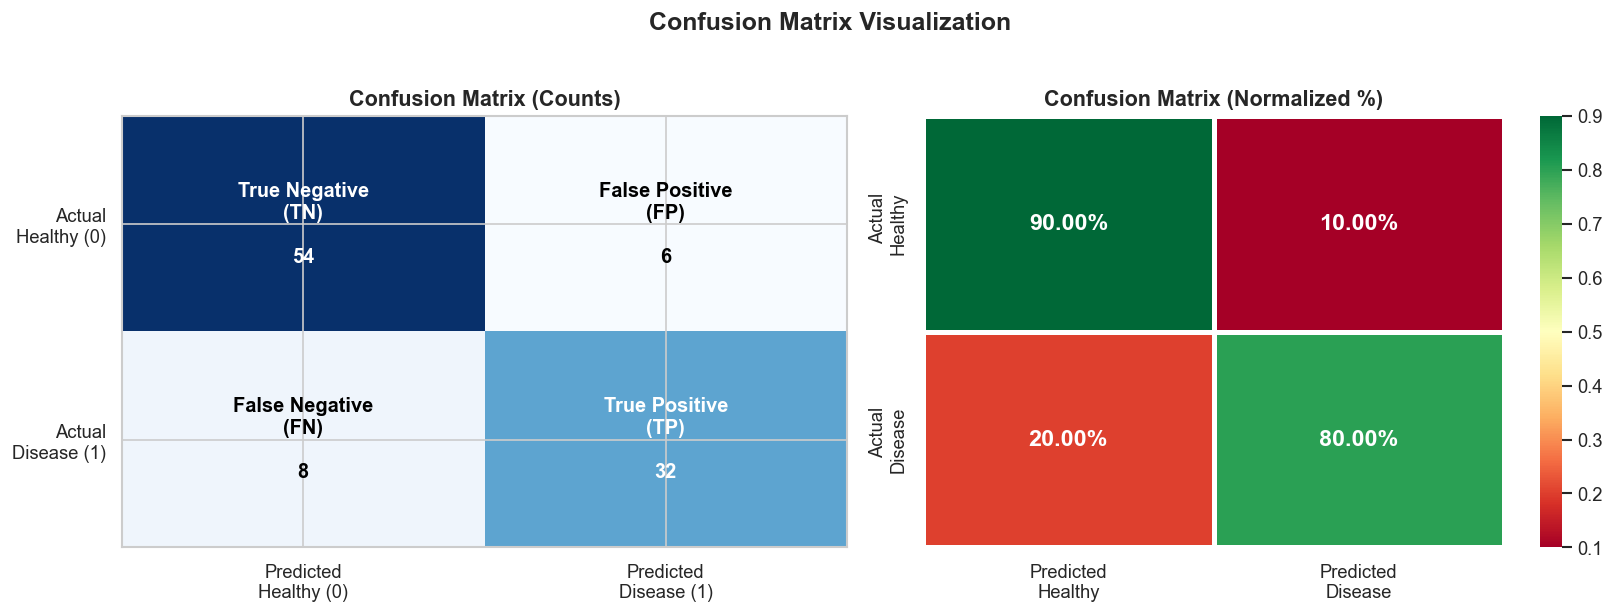

In [7]:
# Beautiful Confusion Matrix Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Plot 1: Raw counts ---
labels = np.array([[f'TN\n{TN}', f'FP\n{FP}'],
                   [f'FN\n{FN}', f'TP\n{TP}']])

custom_colors = np.array([[0.18, 0.8, 0.44],   # TN = green
                           [0.9, 0.3, 0.3],     # FP = red
                           [0.9, 0.5, 0.2],     # FN = orange
                           [0.18, 0.8, 0.44]])  # TP = green

color_matrix = np.array([[[0.18, 0.8, 0.44, 0.7], [0.9, 0.3, 0.3, 0.7]],
                          [[0.9, 0.5, 0.2, 0.7],   [0.18, 0.8, 0.44, 0.7]]])

im = axes[0].imshow(cm, cmap='Blues', aspect='auto')
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(['Predicted\nHealthy (0)', 'Predicted\nDisease (1)'], fontsize=11)
axes[0].set_yticklabels(['Actual\nHealthy (0)', 'Actual\nDisease (1)'], fontsize=11)
axes[0].set_title('Confusion Matrix (Counts)', fontsize=13, fontweight='bold')

cell_labels = [['True Negative\n(TN)', 'False Positive\n(FP)'],
               ['False Negative\n(FN)', 'True Positive\n(TP)']]
cell_values = [[TN, FP], [FN, TP]]

for i in range(2):
    for j in range(2):
        axes[0].text(j, i, f'{cell_labels[i][j]}\n\n{cell_values[i][j]}',
                    ha='center', va='center', fontsize=12, fontweight='bold',
                    color='white' if cell_values[i][j] > cm.max()/2 else 'black')

# --- Plot 2: Normalized (%) ---
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='RdYlGn',
            xticklabels=['Predicted\nHealthy', 'Predicted\nDisease'],
            yticklabels=['Actual\nHealthy', 'Actual\nDisease'],
            ax=axes[1], linewidths=2, linecolor='white',
            annot_kws={'size': 14, 'weight': 'bold'})
axes[1].set_title('Confusion Matrix (Normalized %)', fontsize=13, fontweight='bold')

plt.suptitle('Confusion Matrix Visualization', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## Step 4: Formulas & Metrics

### 1️Accuracy

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

> How many predictions were correct **overall**?
> Misleading when classes are imbalanced!

---

### Precision (Also called Positive Predictive Value)

$$\text{Precision} = \frac{TP}{TP + FP}$$

> Out of everything my model said was **Positive**, how many were actually Positive?
> "When I say Disease, am I right?"

---

### Recall (Also called Sensitivity or True Positive Rate)

$$\text{Recall} = \frac{TP}{TP + FN}$$

> Out of all **actual Positives**, how many did my model catch?
> "Did I find all the sick people?"

---

### F1 Score (Harmonic Mean of Precision & Recall)

$$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

> The **balance** between Precision and Recall.
> Use when both false positives AND false negatives are costly.

---

### Precision vs Recall Trade-off

| Situation | Prioritize |
|-----------|------------|
| Cancer Detection — missing a patient is very costly | **High Recall** (catch all sick) |
| Spam Filter — don't want to delete real emails | **High Precision** (be sure before flagging) |
| Both matter equally | **F1 Score** |

In [8]:
# Calculate all metrics manually to understand them

accuracy  = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall    = TP / (TP + FN)
f1        = 2 * (precision * recall) / (precision + recall)

print('=' * 50)
print('METRICS CALCULATED MANUALLY')
print('=' * 50)
print(f'TP={TP}, TN={TN}, FP={FP}, FN={FN}')
print(f'\nAccuracy  = (TP+TN)/(TP+TN+FP+FN) = ({TP}+{TN})/({TP}+{TN}+{FP}+{FN}) = {accuracy:.4f} ({accuracy*100:.2f}%)')
print(f'\nPrecision = TP/(TP+FP) = {TP}/({TP}+{FP}) = {precision:.4f} ({precision*100:.2f}%)')
print(f'\nRecall    = TP/(TP+FN) = {TP}/({TP}+{FN}) = {recall:.4f} ({recall*100:.2f}%)')
print(f'\nF1 Score  = 2*(P*R)/(P+R) = 2*({precision:.4f}*{recall:.4f})/({precision:.4f}+{recall:.4f}) = {f1:.4f} ({f1*100:.2f}%)')

print('\n--- Sklearn Verification ---')
print(f'Sklearn Accuracy  : {accuracy_score(y_test, y_pred):.4f}')
print(f'Sklearn Precision : {precision_score(y_test, y_pred):.4f}')
print(f'Sklearn Recall    : {recall_score(y_test, y_pred):.4f}')
print(f'Sklearn F1        : {f1_score(y_test, y_pred):.4f}')
print('Manual = Sklearn — Confirmed!')

METRICS CALCULATED MANUALLY
TP=32, TN=54, FP=6, FN=8

Accuracy  = (TP+TN)/(TP+TN+FP+FN) = (32+54)/(32+54+6+8) = 0.8600 (86.00%)

Precision = TP/(TP+FP) = 32/(32+6) = 0.8421 (84.21%)

Recall    = TP/(TP+FN) = 32/(32+8) = 0.8000 (80.00%)

F1 Score  = 2*(P*R)/(P+R) = 2*(0.8421*0.8000)/(0.8421+0.8000) = 0.8205 (82.05%)

--- Sklearn Verification ---
Sklearn Accuracy  : 0.8600
Sklearn Precision : 0.8421
Sklearn Recall    : 0.8000
Sklearn F1        : 0.8205
Manual = Sklearn — Confirmed!


In [9]:
# Full Classification Report
print('SKLEARN CLASSIFICATION REPORT')
print('=' * 55)
print(classification_report(y_test, y_pred,
      target_names=['Healthy (0)', 'Disease (1)']))
print('\nWhat each column means:')
print('  precision : Of all predicted positives, how many were correct?')
print('  recall    : Of all actual positives, how many did we find?')
print('  f1-score  : Harmonic mean of precision and recall')
print('  support   : Number of actual samples in that class')

SKLEARN CLASSIFICATION REPORT
              precision    recall  f1-score   support

 Healthy (0)       0.87      0.90      0.89        60
 Disease (1)       0.84      0.80      0.82        40

    accuracy                           0.86       100
   macro avg       0.86      0.85      0.85       100
weighted avg       0.86      0.86      0.86       100


What each column means:
  precision : Of all predicted positives, how many were correct?
  recall    : Of all actual positives, how many did we find?
  f1-score  : Harmonic mean of precision and recall
  support   : Number of actual samples in that class


---
## Step 5: Visualize All Metrics

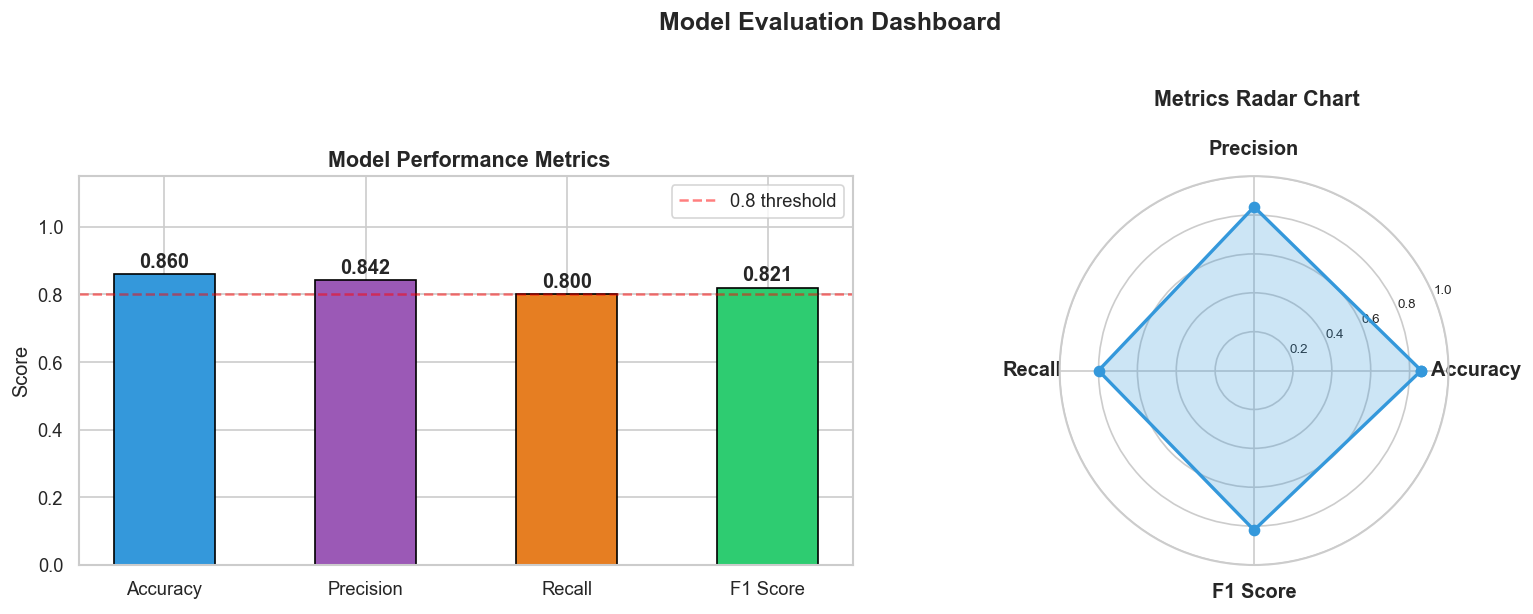

In [10]:
# Plot all 4 metrics as a bar chart
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Bar Chart ---
colors = ['#3498db', '#9b59b6', '#e67e22', '#2ecc71']
bars = axes[0].bar(metrics.keys(), metrics.values(), color=colors,
                   edgecolor='black', width=0.5)
axes[0].set_ylim(0, 1.15)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title(' Model Performance Metrics', fontsize=13, fontweight='bold')
axes[0].axhline(y=0.8, color='red', linestyle='--', alpha=0.5, label='0.8 threshold')
axes[0].legend()

for bar, val in zip(bars, metrics.values()):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{val:.3f}', ha='center', fontsize=12, fontweight='bold')

# --- Radar / Spider Chart ---
categories = list(metrics.keys())
values = list(metrics.values())
values += values[:1]  # close the polygon

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

ax_radar = axes[1]
ax_radar.remove()
ax_radar = fig.add_subplot(122, polar=True)

ax_radar.plot(angles, values, 'o-', color='#3498db', linewidth=2)
ax_radar.fill(angles, values, alpha=0.25, color='#3498db')
ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(categories, fontsize=12, fontweight='bold')
ax_radar.set_ylim(0, 1)
ax_radar.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax_radar.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=8)
ax_radar.set_title(' Metrics Radar Chart', fontsize=13, fontweight='bold', pad=20)
ax_radar.grid(True)

plt.suptitle('Model Evaluation Dashboard', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
##  Step 6: Precision-Recall Trade-off

By changing the **decision threshold** (default = 0.5), we can:
- **Lower threshold** → Model predicts Positive more often → Higher Recall, Lower Precision
- **Raise threshold** → Model is more conservative → Higher Precision, Lower Recall

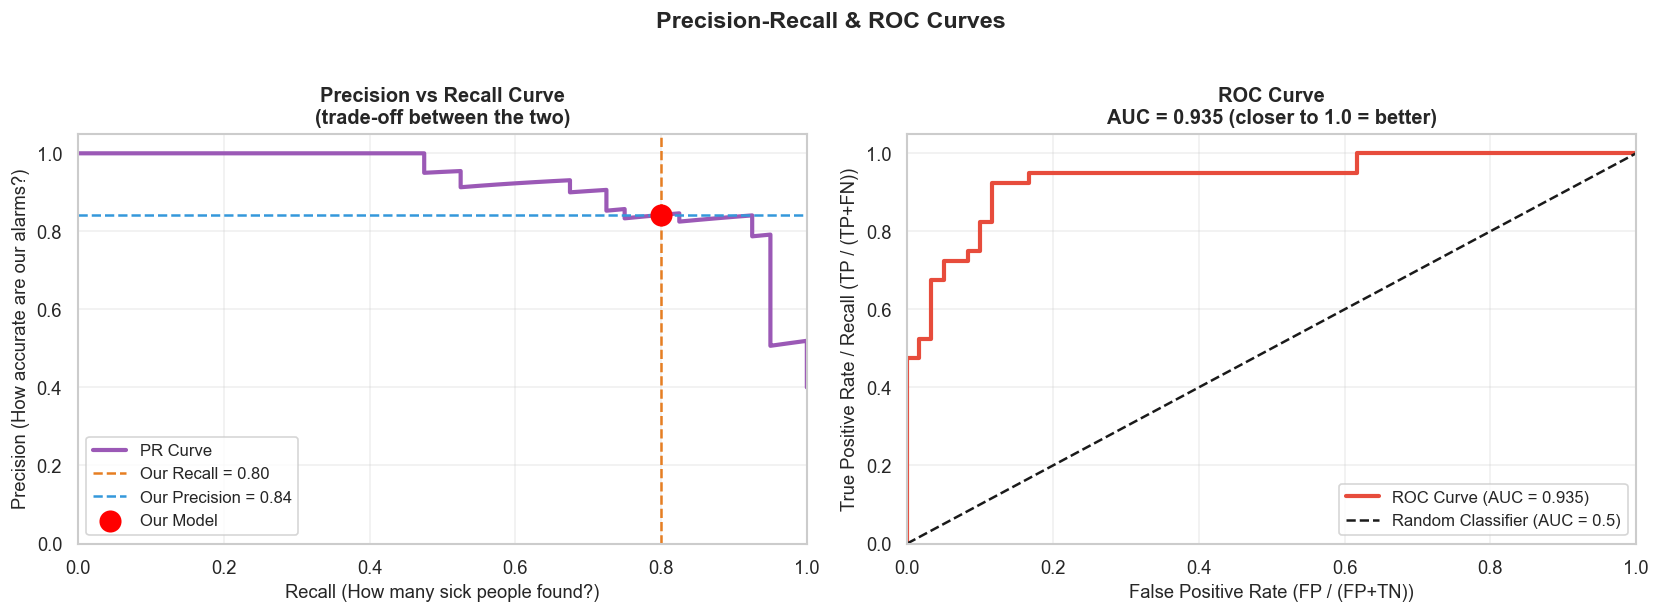

In [11]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Get predicted probabilities (not just 0/1)
y_prob = model.predict_proba(X_test)[:, 1]  # probability of being class 1

# Calculate precision and recall for many thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Precision-Recall Curve ---
axes[0].plot(recalls, precisions, color='#9b59b6', lw=2.5, label='PR Curve')
axes[0].axvline(x=recall, color='#e67e22', linestyle='--', lw=1.5, label=f'Our Recall = {recall:.2f}')
axes[0].axhline(y=precision, color='#3498db', linestyle='--', lw=1.5, label=f'Our Precision = {precision:.2f}')
axes[0].scatter([recall], [precision], color='red', s=150, zorder=5, label='Our Model')
axes[0].set_xlabel('Recall (How many sick people found?)', fontsize=11)
axes[0].set_ylabel('Precision (How accurate are our alarms?)', fontsize=11)
axes[0].set_title('Precision vs Recall Curve\n(trade-off between the two)', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].set_xlim([0, 1]); axes[0].set_ylim([0, 1.05])
axes[0].grid(True, alpha=0.3)

# --- ROC Curve ---
axes[1].plot(fpr, tpr, color='#e74c3c', lw=2.5, label=f'ROC Curve (AUC = {roc_auc:.3f})')
axes[1].plot([0, 1], [0, 1], 'k--', lw=1.5, label='Random Classifier (AUC = 0.5)')
axes[1].set_xlabel('False Positive Rate (FP / (FP+TN))', fontsize=11)
axes[1].set_ylabel('True Positive Rate / Recall (TP / (TP+FN))', fontsize=11)
axes[1].set_title(f'ROC Curve\nAUC = {roc_auc:.3f} (closer to 1.0 = better)', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].set_xlim([0, 1]); axes[1].set_ylim([0, 1.05])
axes[1].grid(True, alpha=0.3)

plt.suptitle('Precision-Recall & ROC Curves', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

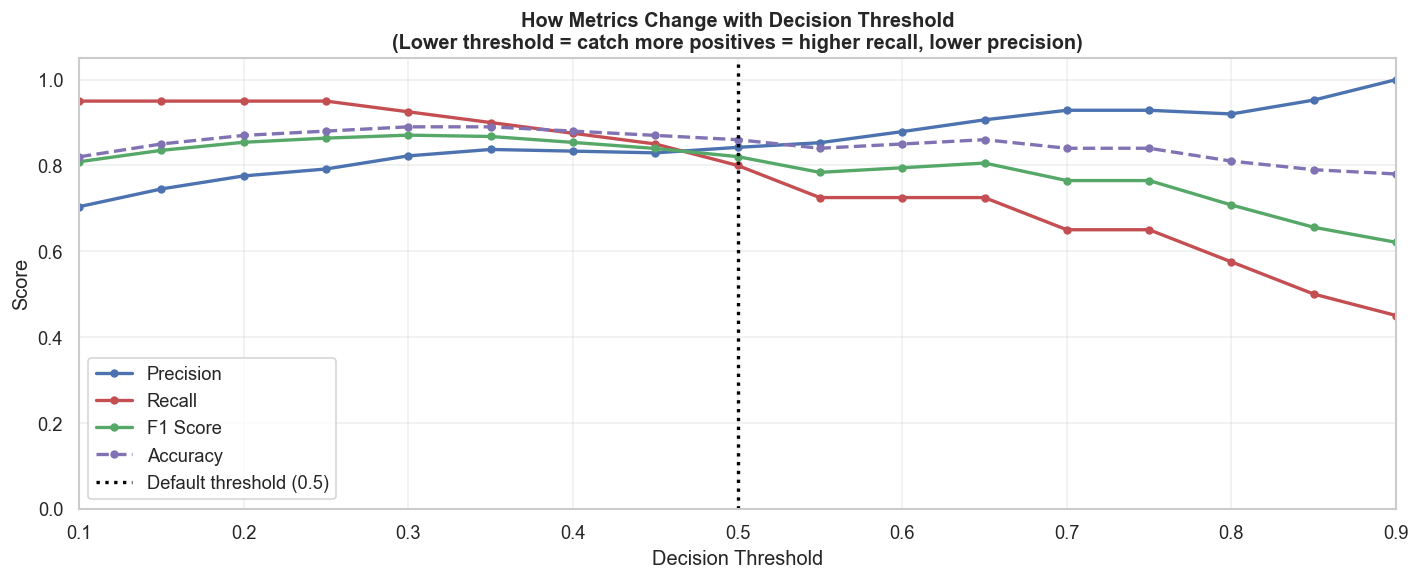

In [12]:
# Show how metrics change with threshold
thresholds_range = np.arange(0.1, 0.95, 0.05)
precisions_t, recalls_t, f1s_t, accs_t = [], [], [], []

for t in thresholds_range:
    y_pred_t = (y_prob >= t).astype(int)
    precisions_t.append(precision_score(y_test, y_pred_t, zero_division=0))
    recalls_t.append(recall_score(y_test, y_pred_t, zero_division=0))
    f1s_t.append(f1_score(y_test, y_pred_t, zero_division=0))
    accs_t.append(accuracy_score(y_test, y_pred_t))

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(thresholds_range, precisions_t, 'b-o', ms=4, label='Precision', lw=2)
ax.plot(thresholds_range, recalls_t, 'r-o', ms=4, label='Recall', lw=2)
ax.plot(thresholds_range, f1s_t, 'g-o', ms=4, label='F1 Score', lw=2)
ax.plot(thresholds_range, accs_t, 'm--o', ms=4, label='Accuracy', lw=2)
ax.axvline(x=0.5, color='black', linestyle=':', lw=2, label='Default threshold (0.5)')
ax.set_xlabel('Decision Threshold', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('How Metrics Change with Decision Threshold\n(Lower threshold = catch more positives = higher recall, lower precision)', 
             fontsize=12, fontweight='bold')
ax.legend(fontsize=11)
ax.set_xlim([0.1, 0.9]); ax.set_ylim([0, 1.05])
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
## Step 7: Intuition with a Simple Example

Let's make it super concrete with a **tiny example** of 10 patients.

In [13]:
#  Simple 10-patient example for intuition
simple_actual = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]  # 5 sick, 5 healthy
simple_pred   = [1, 1, 1, 0, 0, 1, 0, 0, 0, 0]  # model's predictions

outcomes = []
for actual, pred in zip(simple_actual, simple_pred):
    if actual == 1 and pred == 1: outcomes.append('TP ✅')
    elif actual == 0 and pred == 0: outcomes.append('TN ✅')
    elif actual == 0 and pred == 1: outcomes.append('FP ❌ False Alarm')
    else: outcomes.append('FN ❌ Missed!')

simple_df = pd.DataFrame({
    'Patient': range(1, 11),
    'Actual': ['Disease' if x == 1 else 'Healthy' for x in simple_actual],
    'Predicted': ['Disease' if x == 1 else 'Healthy' for x in simple_pred],
    'Outcome': outcomes
})

print('Simple 10-Patient Example:')
print(simple_df.to_string(index=False))

TP2 = sum(1 for a, p in zip(simple_actual, simple_pred) if a==1 and p==1)
TN2 = sum(1 for a, p in zip(simple_actual, simple_pred) if a==0 and p==0)
FP2 = sum(1 for a, p in zip(simple_actual, simple_pred) if a==0 and p==1)
FN2 = sum(1 for a, p in zip(simple_actual, simple_pred) if a==1 and p==0)

print(f'\nTP={TP2}, TN={TN2}, FP={FP2}, FN={FN2}')
print(f'Precision = {TP2}/{TP2+FP2} = {TP2/(TP2+FP2):.2f} — When model said Disease, correct {TP2} of {TP2+FP2} times')
print(f'Recall    = {TP2}/{TP2+FN2} = {TP2/(TP2+FN2):.2f} — Of 5 sick patients, model found {TP2}')
f1_2 = 2*TP2/(2*TP2+FP2+FN2)
print(f'F1 Score  = {f1_2:.2f}')

Simple 10-Patient Example:
 Patient  Actual Predicted          Outcome
       1 Disease   Disease             TP ✅
       2 Disease   Disease             TP ✅
       3 Disease   Disease             TP ✅
       4 Disease   Healthy     FN ❌ Missed!
       5 Disease   Healthy     FN ❌ Missed!
       6 Healthy   Disease FP ❌ False Alarm
       7 Healthy   Healthy             TN ✅
       8 Healthy   Healthy             TN ✅
       9 Healthy   Healthy             TN ✅
      10 Healthy   Healthy             TN ✅

TP=3, TN=4, FP=1, FN=2
Precision = 3/4 = 0.75 — When model said Disease, correct 3 of 4 times
Recall    = 3/5 = 0.60 — Of 5 sick patients, model found 3
F1 Score  = 0.67


---
## Summary — Everything in One Place

| Metric | Formula | Best When |
|--------|---------|----------|
| **Accuracy** | (TP+TN) / Total | Classes are balanced |
| **Precision** | TP / (TP + FP) | FP is costly (spam filter) |
| **Recall** | TP / (TP + FN) | FN is costly (cancer detection) |
| **F1 Score** | 2·P·R / (P+R) | Imbalanced classes, both FP & FN matter |

### Key Takeaways

1. **Accuracy alone is misleading** — if 95% of emails are NOT spam, a model that predicts "not spam" always gets 95% accuracy but catches 0 spam!
2. **Precision** — "Don't cry wolf" — Only raise alarm when you're sure
3. **Recall** — "Don't miss anyone" — Find all the positives
4. **F1** — The golden balance between the two
5. **Confusion Matrix** is your starting point — look at what **type** of errors you're making

---
> **Pro tip**: Always plot your confusion matrix first. It tells you the story — are you missing sick patients (FN) or raising false alarms (FP)? That tells you which metric to optimize!

## If you found this notebook helpful...
If you liked this content, please consider upvoting this notebook and following me for more data science and machine learning projects. Your support motivates me to create more quality content. Thank you.
